In [1]:
import os
import sys
import torch
import json
import plotly.express as px
from transformer_lens import utils
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../scripts")
from error_eval import *
from plots import *

In [2]:
cwd = os.getcwd()
cwd = cwd.split("notebooks")[0]
print(cwd)

/n/data2/hms/dbmi/sunyaev/lab/dlee/ai_safety/sae_pathology/


# Plot For A SAE Local Model

In [3]:
directory = "/n/data2/hms/dbmi/sunyaev/lab/dlee/ai_safety/sae_pathology/results/feature_extrapolation/gpt2_resid_pre/"
model_id = "uiwt81f1"
df = pd.read_csv(directory + f"e2e_{model_id}_layer_6_seed_23_batchsize_1_pos_all.csv")
# df = df[df["position"] != 0]

In [31]:
col_names = [f'{feature_type}_feature_length_{length}_kl' for feature_type in ["alive", "active", "dead"] for length in range(1, 211, 10)]
col_names_201 = [f'{feature_type}_feature_length_{length}_kl' for feature_type in ["alive", "active", "dead"] for length in [201]]


## Plot Mean

In [4]:
mean_df = pd.DataFrame(df.mean(axis=0)).T
mean_df_melt = pd.melt(mean_df, id_vars=['reconstruction_error'], value_vars=col_names, ignore_index=False)
mean_df_melt["error_length"] = mean_df_melt["variable"].str.split("_", expand = True)[3].astype(int)
mean_df_melt["error_direction"] = mean_df_melt["variable"].str.split("_", expand = True)[0]

<Axes: xlabel='error_length', ylabel='value'>

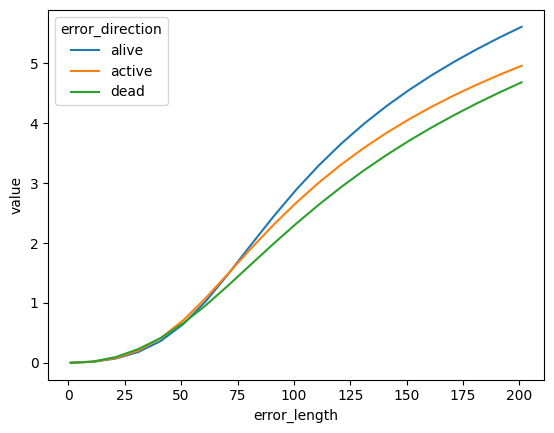

In [9]:
## for e2e SAE 4d5ksz89

sns.lineplot(data=mean_df_melt, x="error_length", y="value", hue = "error_direction")


<Axes: xlabel='error_length', ylabel='value'>

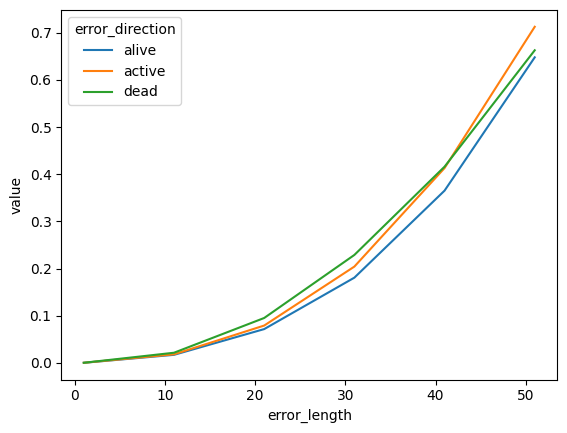

In [11]:
mean_df_melt_plot = mean_df_melt[(mean_df_melt["error_length"] <= 51)]

sns.lineplot(data=mean_df_melt_plot, x="error_length", y="value", hue = "error_direction")


## Plot Var

In [15]:
var_df = pd.DataFrame(df.var(axis=0)).T
var_df_melt = pd.melt(var_df, id_vars=['reconstruction_error'], value_vars=col_names, ignore_index=False)
var_df_melt["error_length"] = var_df_melt["variable"].str.split("_", expand = True)[3].astype(int)
var_df_melt["error_direction"] = var_df_melt["variable"].str.split("_", expand = True)[0]

<Axes: xlabel='error_length', ylabel='value'>

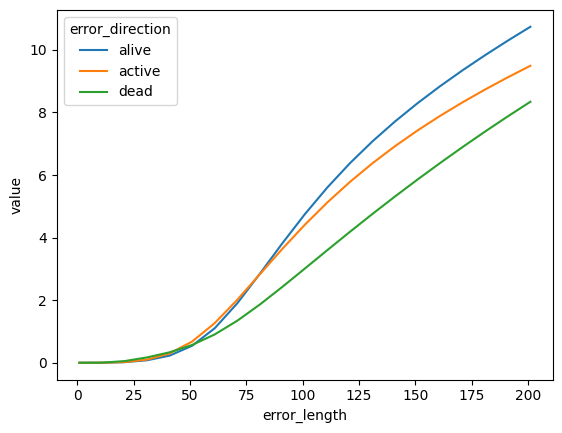

In [18]:
## for e2e SAE 4d5ksz89

sns.lineplot(data=var_df_melt, x="error_length", y="value", hue = "error_direction")


<Axes: xlabel='error_length', ylabel='value'>

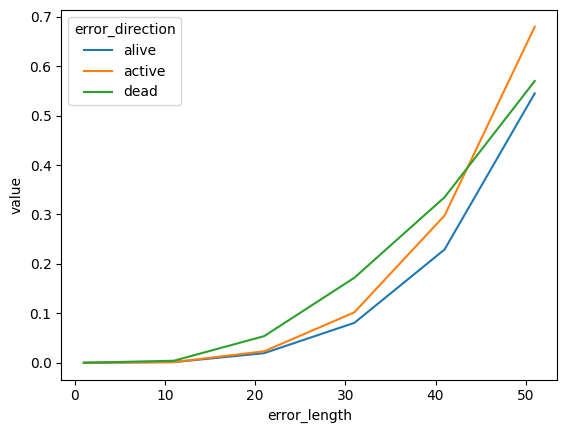

In [19]:
var_df_melt_plot = var_df_melt[(var_df_melt["error_length"] <= 51)]

sns.lineplot(data=var_df_melt_plot, x="error_length", y="value", hue = "error_direction")


## Plot some samples

In [96]:
for i in range(9):
    df_sample = df.sample(n = 7)
    df_sample_melt = pd.melt(df_sample, id_vars=['token'], value_vars=col_names, ignore_index=False)
    df_sample_melt["perturb_length"] = df_sample_melt["variable"].str.split("_", expand = True)[3].astype(int)
    df_sample_melt["perturb_direction"] = df_sample_melt["variable"].str.split("_", expand = True)[0]
    df_sample_melt["index"] = df_sample_melt.index
    df_sample_melt["iteration"] = i

    if i == 0:
        df_sample_melt_all = df_sample_melt.copy()
    else:
        df_sample_melt_all = pd.concat([df_sample_melt_all, df_sample_melt])

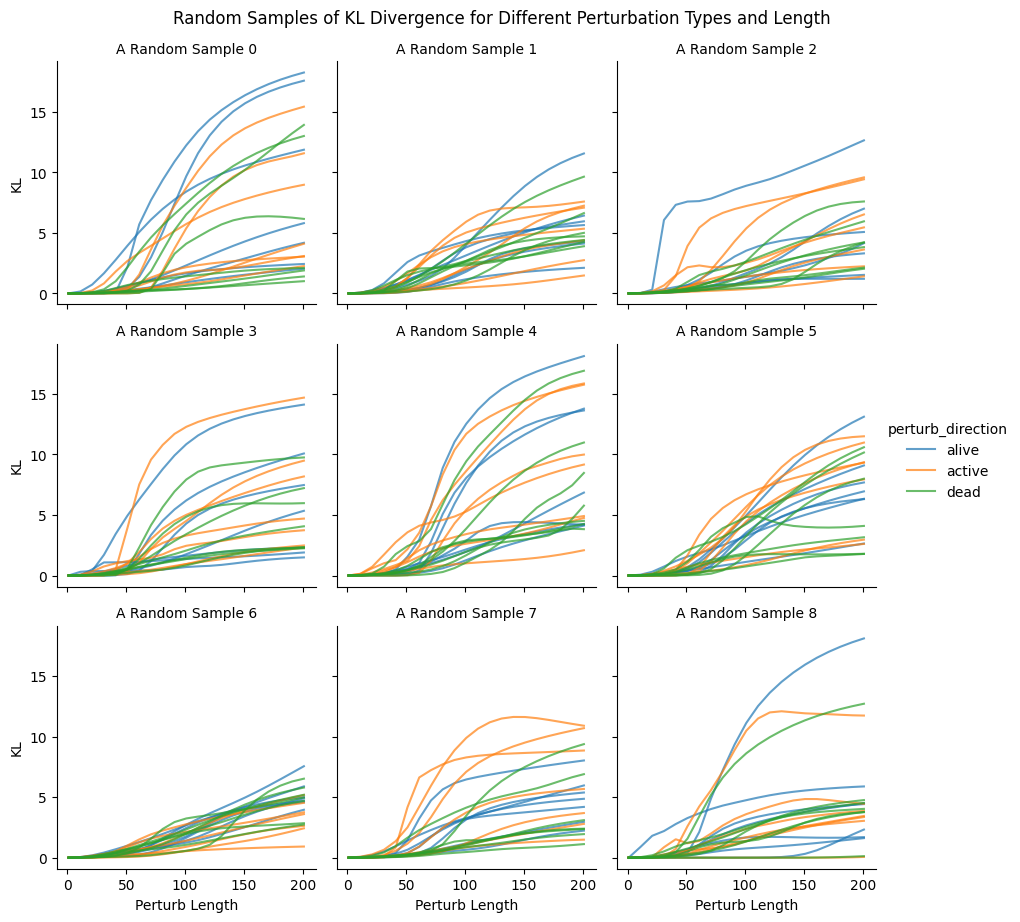

In [97]:
# g = sns.FacetGrid(df_sample_melt_all, col="iteration", col_wrap = 3, height=5, margin_titles=True, hue = "perturb_direction")

g = sns.FacetGrid(df_sample_melt_all, col="iteration", col_wrap = 3, hue = "perturb_direction")

g.map_dataframe(sns.lineplot, x='perturb_length', y='value', units='index', estimator=None, alpha = 0.7)
g.set_titles(col_template="A Random Sample {col_name}")

g.fig.suptitle(f'Random Samples of KL Divergence for Different Perturbation Types and Length', y = 1.02)

g.set(xlabel="Perturb Length", ylabel = "KL")
g.add_legend()

# plt.savefig("extrapolation_error.svg", format="svg", bbox_inches="tight")

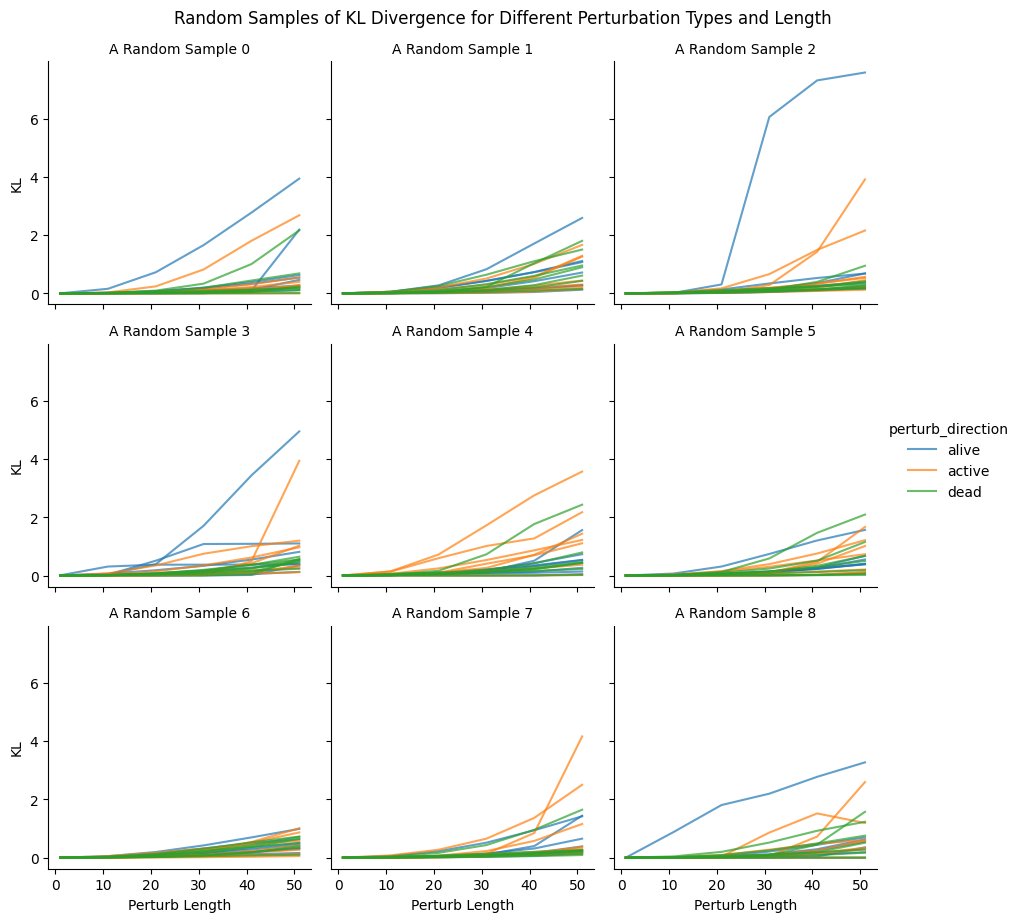

In [98]:
df_sample_melt_all_plot = df_sample_melt_all[df_sample_melt_all["perturb_length"] <= 51]
g = sns.FacetGrid(df_sample_melt_all_plot, col="iteration", col_wrap = 3, hue = "perturb_direction")

g.map_dataframe(sns.lineplot, x='perturb_length', y='value', units='index', estimator=None, alpha = 0.7)
g.set_titles(col_template="A Random Sample {col_name}")

g.fig.suptitle(f'Random Samples of KL Divergence for Different Perturbation Types and Length', y = 1.02)

g.set(xlabel="Perturb Length", ylabel = "KL")
g.add_legend()

# plt.savefig("extrapolation_error.svg", format="svg", bbox_inches="tight")

In [110]:
df.iloc[723081]

token                          398.000000
position                        70.000000
loss                             0.002730
alive_feature_length_1_loss      0.002687
alive_feature_length_1_kl        0.000001
                                  ...    
sae_l1                         368.355470
reconstruction_error            16.236292
norm                            81.600490
sae_norm                        77.902530
cos                              0.980341
Name: 723081, Length: 135, dtype: float64

In [111]:
df_sample_melt_all_2[(df_sample_melt_all_2["iteration"] == 0) & (df_sample_melt_all_2["perturb_length"] <= 51)
                    & (df_sample_melt_all_2["index"] == 723081)].sort_values("value")

,token,variable,value,perturb_length,perturb_direction,index,iteration
723081,398,alive_feature_length_1_kl,0.000001,1,alive,723081,0
723081,398,dead_feature_length_1_kl,0.000002,1,dead,723081,0
723081,398,active_feature_length_1_kl,0.000004,1,active,723081,0
723081,398,dead_feature_length_11_kl,0.000199,11,dead,723081,0
723081,398,alive_feature_length_11_kl,0.000530,11,alive,723081,0
723081,398,dead_feature_length_21_kl,0.000772,21,dead,723081,0
723081,398,active_feature_length_11_kl,0.002073,11,active,723081,0
723081,398,dead_feature_length_31_kl,0.002523,31,dead,723081,0
723081,398,alive_feature_length_21_kl,0.010280,21,alive,723081,0
723081,398,dead_feature_length_41_kl,0.011056,41,dead,723081,0


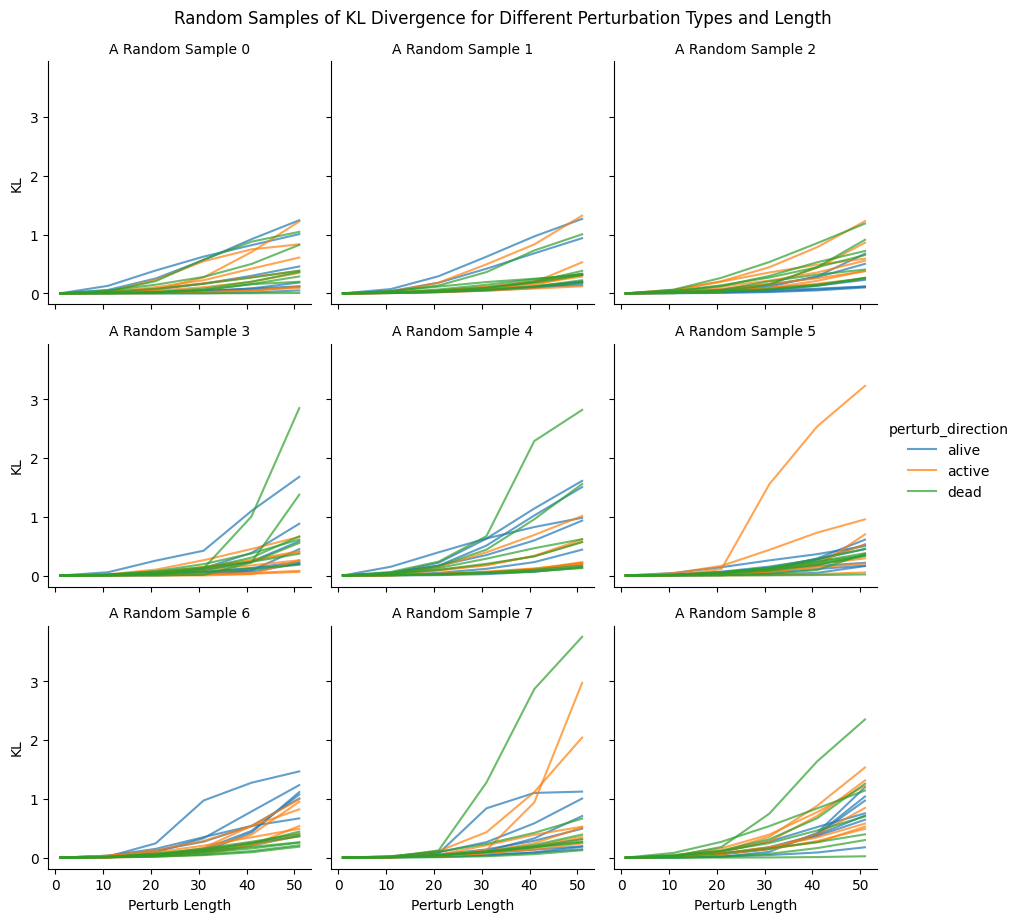

In [113]:
for i in range(9):
    df_sample = df.sample(n = 7)
    df_sample_melt = pd.melt(df_sample, id_vars=['token'], value_vars=col_names, ignore_index=False)
    df_sample_melt["perturb_length"] = df_sample_melt["variable"].str.split("_", expand = True)[3].astype(int)
    df_sample_melt["perturb_direction"] = df_sample_melt["variable"].str.split("_", expand = True)[0]
    df_sample_melt["index"] = df_sample_melt.index
    df_sample_melt["iteration"] = i

    if i == 0:
        df_sample_melt_all_2 = df_sample_melt.copy()
    else:
        df_sample_melt_all_2 = pd.concat([df_sample_melt_all_2, df_sample_melt])

df_sample_melt_all_plot = df_sample_melt_all_2[df_sample_melt_all_2["perturb_length"] <= 51]
g = sns.FacetGrid(df_sample_melt_all_plot, col="iteration", col_wrap = 3, hue = "perturb_direction")

g.map_dataframe(sns.lineplot, x='perturb_length', y='value', units='index', estimator=None, alpha = 0.7)
g.set_titles(col_template="A Random Sample {col_name}")

g.fig.suptitle(f'Random Samples of KL Divergence for Different Perturbation Types and Length', y = 1.02)

g.set(xlabel="Perturb Length", ylabel = "KL")
g.add_legend()

# plt.savefig("extrapolation_error.svg", format="svg", bbox_inches="tight")

<Axes: xlabel='perturb_length', ylabel='value'>

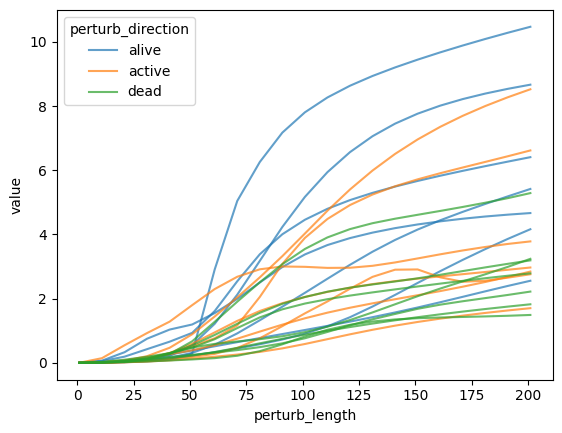

In [101]:
sns.lineplot(data=df_sample_melt, x="perturb_length", y="value", hue = "perturb_direction", estimator = None, units = "index", alpha = 0.7)

<Axes: xlabel='perturb_length', ylabel='value'>

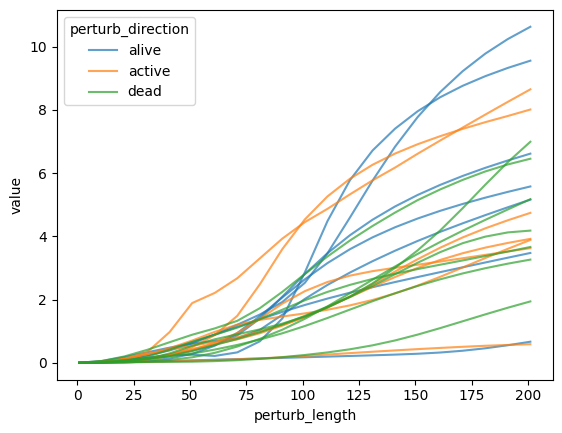

In [69]:
sns.lineplot(data=df_sample_melt, x="perturb_length", y="value", hue = "perturb_direction", estimator = None, units = "index", alpha = 0.7)


## Plot Distribution of Perturb Length Slice

In [34]:
df_melt = pd.melt(df, id_vars=['token'], value_vars=col_names_201, ignore_index=False)
df_melt["error_direction"] = df_melt["variable"].str.split("_", expand = True)[0]


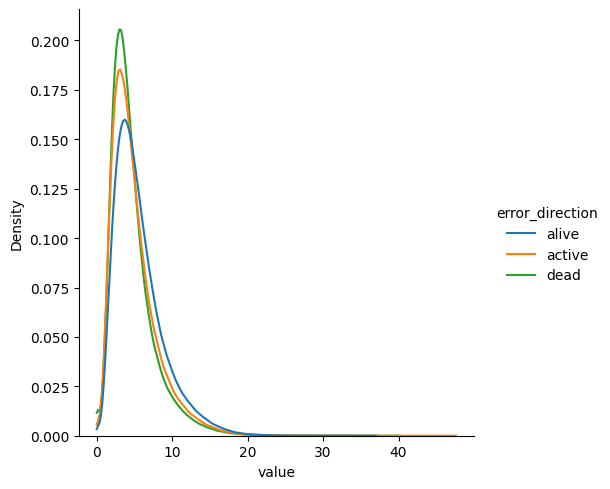

In [39]:
error_length

sns.displot(df_melt, x="value", hue="error_direction", common_norm=False, kind = "kde", cut=0)


In [41]:
df_melt

,token,variable,value,error_direction
0,50256,alive_feature_length_201_kl,2.472692,alive
1,17402,alive_feature_length_201_kl,4.810239,alive
2,22038,alive_feature_length_201_kl,5.871099,alive
3,4870,alive_feature_length_201_kl,6.501952,alive
4,7806,alive_feature_length_201_kl,14.109979,alive
...,...,...,...,...
2031995,3936,dead_feature_length_201_kl,1.456942,dead
2031996,329,dead_feature_length_201_kl,2.478977,dead
2031997,257,dead_feature_length_201_kl,5.249169,dead
2031998,1178,dead_feature_length_201_kl,5.466972,dead


Text(0.5, 0.98, 'Perturb Length: 21')

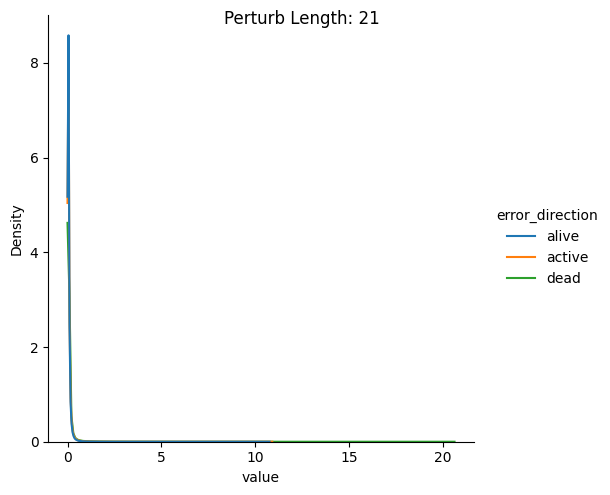

In [42]:
error_length = 21
col_names_value = [f'{feature_type}_feature_length_{length}_kl' for feature_type in ["alive", "active", "dead"] for length in [error_length]]
df_melt = pd.melt(df, id_vars=['token'], value_vars=col_names_value, ignore_index=False)
df_melt["error_direction"] = df_melt["variable"].str.split("_", expand = True)[0]

g = sns.displot(df_melt, x="value", hue="error_direction", common_norm=False, kind = "kde", cut=0)
g.fig.suptitle(f'Perturb Length: {error_length}')


In [13]:
df_126 = df[df["position"] == 126]
df_20 = df[df["position"] == 20]

In [16]:
df_melt

,token,variable,value,error_length,error_direction
20,290,alive_feature_length_1_kl,0.000099,1,alive
147,351,alive_feature_length_1_kl,0.000069,1,alive
274,13,alive_feature_length_1_kl,0.000063,1,alive
401,1975,alive_feature_length_1_kl,0.000144,1,alive
528,3173,alive_feature_length_1_kl,0.000074,1,alive
...,...,...,...,...,...
2031385,2840,dead_feature_length_201_kl,9.236586,201,dead
2031512,860,dead_feature_length_201_kl,4.579468,201,dead
2031639,3347,dead_feature_length_201_kl,3.763716,201,dead
2031766,198,dead_feature_length_201_kl,0.738012,201,dead


In [23]:
df_melt = pd.melt(df_126, id_vars=['token'], value_vars=col_names, ignore_index=False)
df_melt["error_length"] = df_melt["variable"].str.split("_", expand = True)[3].astype(int)
df_melt["error_direction"] = df_melt["variable"].str.split("_", expand = True)[0]

<Axes: xlabel='error_length', ylabel='value'>

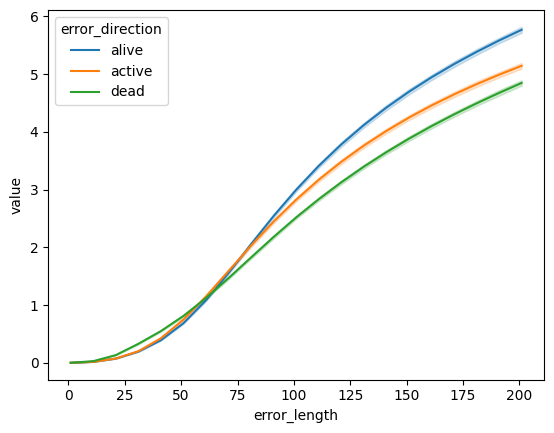

In [24]:
## for e2e SAE 4d5ksz89

sns.lineplot(data=df_melt, x="error_length", y="value", hue="error_direction")

In [20]:
df_melt[df_melt["token"] == 290]

,token,variable,value,error_length,error_direction
20,290,alive_feature_length_1_kl,0.000099,1,alive
3703,290,alive_feature_length_1_kl,0.000097,1,alive
22245,290,alive_feature_length_1_kl,0.000059,1,alive
32151,290,alive_feature_length_1_kl,0.000148,1,alive
34818,290,alive_feature_length_1_kl,0.000067,1,alive
...,...,...,...,...,...
2004715,290,dead_feature_length_201_kl,4.036641,201,dead
2017542,290,dead_feature_length_201_kl,5.421787,201,dead
2024146,290,dead_feature_length_201_kl,5.424740,201,dead
2027575,290,dead_feature_length_201_kl,3.599079,201,dead


<Axes: xlabel='error_length', ylabel='value'>

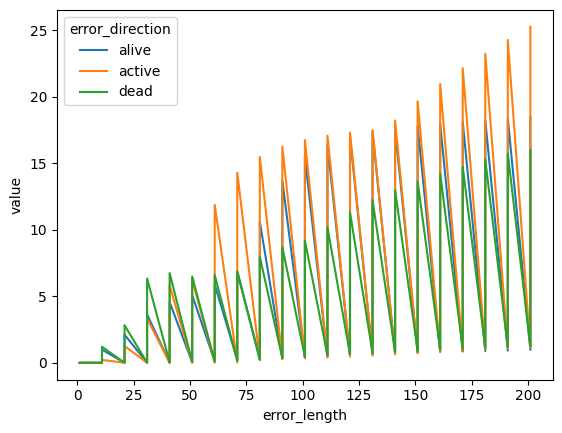

In [25]:
## for e2e SAE 4d5ksz89
df_melt_plot = df_melt[df_melt["token"] == 290]

sns.lineplot(data=df_melt_plot, x="error_length", y="value", hue="error_direction", estimator = None)

In [18]:
df_melt

,token,variable,value,error_length,error_direction
20,290,alive_feature_length_1_kl,0.000099,1,alive
147,351,alive_feature_length_1_kl,0.000069,1,alive
274,13,alive_feature_length_1_kl,0.000063,1,alive
401,1975,alive_feature_length_1_kl,0.000144,1,alive
528,3173,alive_feature_length_1_kl,0.000074,1,alive
...,...,...,...,...,...
2031385,2840,dead_feature_length_201_kl,9.236586,201,dead
2031512,860,dead_feature_length_201_kl,4.579468,201,dead
2031639,3347,dead_feature_length_201_kl,3.763716,201,dead
2031766,198,dead_feature_length_201_kl,0.738012,201,dead


In [1]:
from e2e_sae.scripts.analysis.utils import create_run_df, get_df_gpt2
df = get_df_gpt2()

performance_df = df.copy()

#get models that were used in the performance plot of the paper
performance_df = df.loc[(df["ratio"] == 60) & (df["seed"] == 0) & (df["n_samples"] == 400_000)]

# Ignore specialised runs
performance_df = performance_df.loc[
    ~performance_df["name"].str.contains("seed-comparison")
    & ~performance_df["name"].str.contains("lr-comparison")
    & ~performance_df["name"].str.contains("lower-downstream")
    & -performance_df["name"].str.contains("e2e-local")
    & ~performance_df["name"].str.contains("recon-all")
    & ~performance_df["name"].str.contains("misc_")]

columns_list = ["id", "sae_pos", "run_type", "layer", "L0", "CELossIncrease", "alive_dict_elements"]
df_local = performance_df[(performance_df["layer"] == 6) & (performance_df["run_type"] == "local")].sort_values("L0")
df_e2e = performance_df[(performance_df["layer"] == 6) & (performance_df["run_type"] == "e2e")].sort_values("L0")
df_downstream = performance_df[(performance_df["layer"] == 6) & (performance_df["run_type"] == "downstream")].sort_values("L0")

Processing runs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:11<00:00, 25.85it/s]


In [7]:
df_e2e["run_type"]

251    e2e
250    e2e
249    e2e
248    e2e
247    e2e
246    e2e
Name: run_type, dtype: object

In [71]:
len(df_e2e) + len(df_local) + len(df_downstream)

22

In [80]:
df_interest = pd.concat([df_local, df_e2e, df_downstream])

df_interest = pd.concat([df_local, df_e2e, df_downstream]).reset_index(drop = True)
# df_interest = df_interest[(df_interest["L0"] > 35)].reset_index(drop = True)

pos = 'all'
# layers = list(range(12))
layers = [6]
sae_name = 'gpt2_resid_pre'

model_list = [f"e2e_{x}" for x in df_interest["id"]]

result_dfs = {}
for i in range(len(model_list)):
    data_path = os.path.join(
        cwd + '/results/error_extrapolation_results',
        sae_name,
        f'{model_list[i]}_layer_6_pos_{pos}.csv',
    )
    result_dfs[i] = pd.read_csv(data_path)
    

model_names_list = [f"Braun et al. \n$SAE_{run_type}$ \nL0 = {x:.2f}" for (x, run_type) in zip(df_interest["L0"], df_interest["run_type"])]


mean_df = pd.DataFrame({
        l: result_dfs[l].mean(axis=0) for l in range(len(model_names_list))
    }).T

mean_df["L0"] = df_interest["L0"]
mean_df["type"] = df_interest["run_type"]

In [81]:
mean_df

,token,position,loss,error_length_1_loss,error_length_1_kl,error_length_11_loss,error_length_11_kl,error_length_21_loss,error_length_21_kl,error_length_31_loss,...,error_length_201_loss,error_length_201_kl,sae_l0,sae_l1,reconstruction_error,norm,sae_norm,cos,L0,type
0,4738.867746,63.0,3.557865,3.555771,0.000234,3.569024,0.039387,3.744713,0.242880,4.320815,...,12.024907,8.677073,9.940678,93.285198,36.059806,102.278208,82.296992,0.900423,10.271713,local
1,4738.867746,63.0,3.557865,3.555722,0.000263,3.570509,0.041501,3.725594,0.224245,4.186103,...,11.539696,8.178201,16.954113,110.142098,29.591295,102.278208,88.185066,0.932581,17.468240,local
2,4738.867746,63.0,3.557865,3.555970,0.000275,3.573285,0.040932,3.710517,0.201841,4.072998,...,11.072661,7.689569,29.680497,127.461203,24.628616,102.278208,92.561010,0.952543,30.945175,local
3,4738.867746,63.0,3.557865,3.556109,0.000274,3.573399,0.039313,3.696693,0.184341,4.011661,...,10.688512,7.286177,40.660933,138.028827,22.497630,102.278208,94.373836,0.960076,42.798630,local
4,4738.867746,63.0,3.557865,3.555939,0.000271,3.570574,0.038154,3.683892,0.174513,3.970951,...,10.520370,7.129909,50.513713,145.083386,21.354410,102.278208,95.215543,0.964020,53.223964,local
5,4738.867746,63.0,3.557865,3.555952,0.000266,3.569843,0.036914,3.675834,0.165285,3.939050,...,10.213435,6.820443,66.485167,154.668322,20.072467,102.278208,96.156254,0.968153,69.426438,local
6,4738.867746,63.0,3.557865,3.555845,0.000257,3.566473,0.034824,3.658963,0.151154,3.887912,...,9.978464,6.592052,96.483264,169.283954,18.611699,102.278208,97.123783,0.972743,102.580427,local
7,4738.867746,63.0,3.557865,3.556474,0.000236,3.570274,0.031103,3.653394,0.130833,3.848251,...,9.580158,6.145348,175.879770,197.522936,16.504589,102.278208,98.395249,0.978490,183.948012,local
8,4738.867746,63.0,3.557865,3.556491,0.000215,3.567565,0.027696,3.637651,0.113620,3.799099,...,8.936217,5.501217,510.259476,277.317539,13.234724,102.278208,99.820891,0.986301,512.987541,local
9,4738.867746,63.0,3.557865,3.557959,0.000076,3.568595,0.010976,3.604812,0.048816,3.686677,...,20.701561,17.385255,23.053423,18.750162,96.847381,102.278208,10.764572,0.463443,21.028400,e2e


In [82]:
col_names = [f'error_length_{length}_kl' for length in range(1, 211, 10)]
mean_df_melt_kl = pd.melt(mean_df, id_vars=['reconstruction_error', 'L0', 'type'], value_vars=col_names, ignore_index=False)
mean_df_melt_kl["metric"] = "KL"

col_names = [f'error_length_{length}_loss' for length in range(1, 211, 10)]
mean_df_melt_loss = pd.melt(mean_df, id_vars=['reconstruction_error', 'L0', 'type'], value_vars=col_names, ignore_index=False)
mean_df_melt_loss["metric"] = "Loss"

mean_df_melt = pd.concat([mean_df_melt_kl, mean_df_melt_loss])
mean_df_melt["error_length"] = mean_df_melt["variable"].str.split("_", expand = True)[2].astype(int)

In [83]:
mean_df_melt["L0"] = [f"{x:.1f}" for x in mean_df_melt["L0"]]
mean_df_melt["L0"] = mean_df_melt["L0"].astype(float)

In [84]:
mean_df_melt["L0"

,reconstruction_error,L0,type,variable,value,metric,error_length
0,36.059806,10.3,local,error_length_1_kl,0.000234,KL,1
1,29.591295,17.5,local,error_length_1_kl,0.000263,KL,1
2,24.628616,30.9,local,error_length_1_kl,0.000275,KL,1
3,22.497630,42.8,local,error_length_1_kl,0.000274,KL,1
4,21.354410,53.2,local,error_length_1_kl,0.000271,KL,1
...,...,...,...,...,...,...,...
17,43.970155,46.5,downstream,error_length_201_loss,13.504122,Loss,201
18,39.060228,58.8,downstream,error_length_201_loss,12.763907,Loss,201
19,32.357821,90.0,downstream,error_length_201_loss,12.272878,Loss,201
20,27.635548,131.3,downstream,error_length_201_loss,12.005334,Loss,201


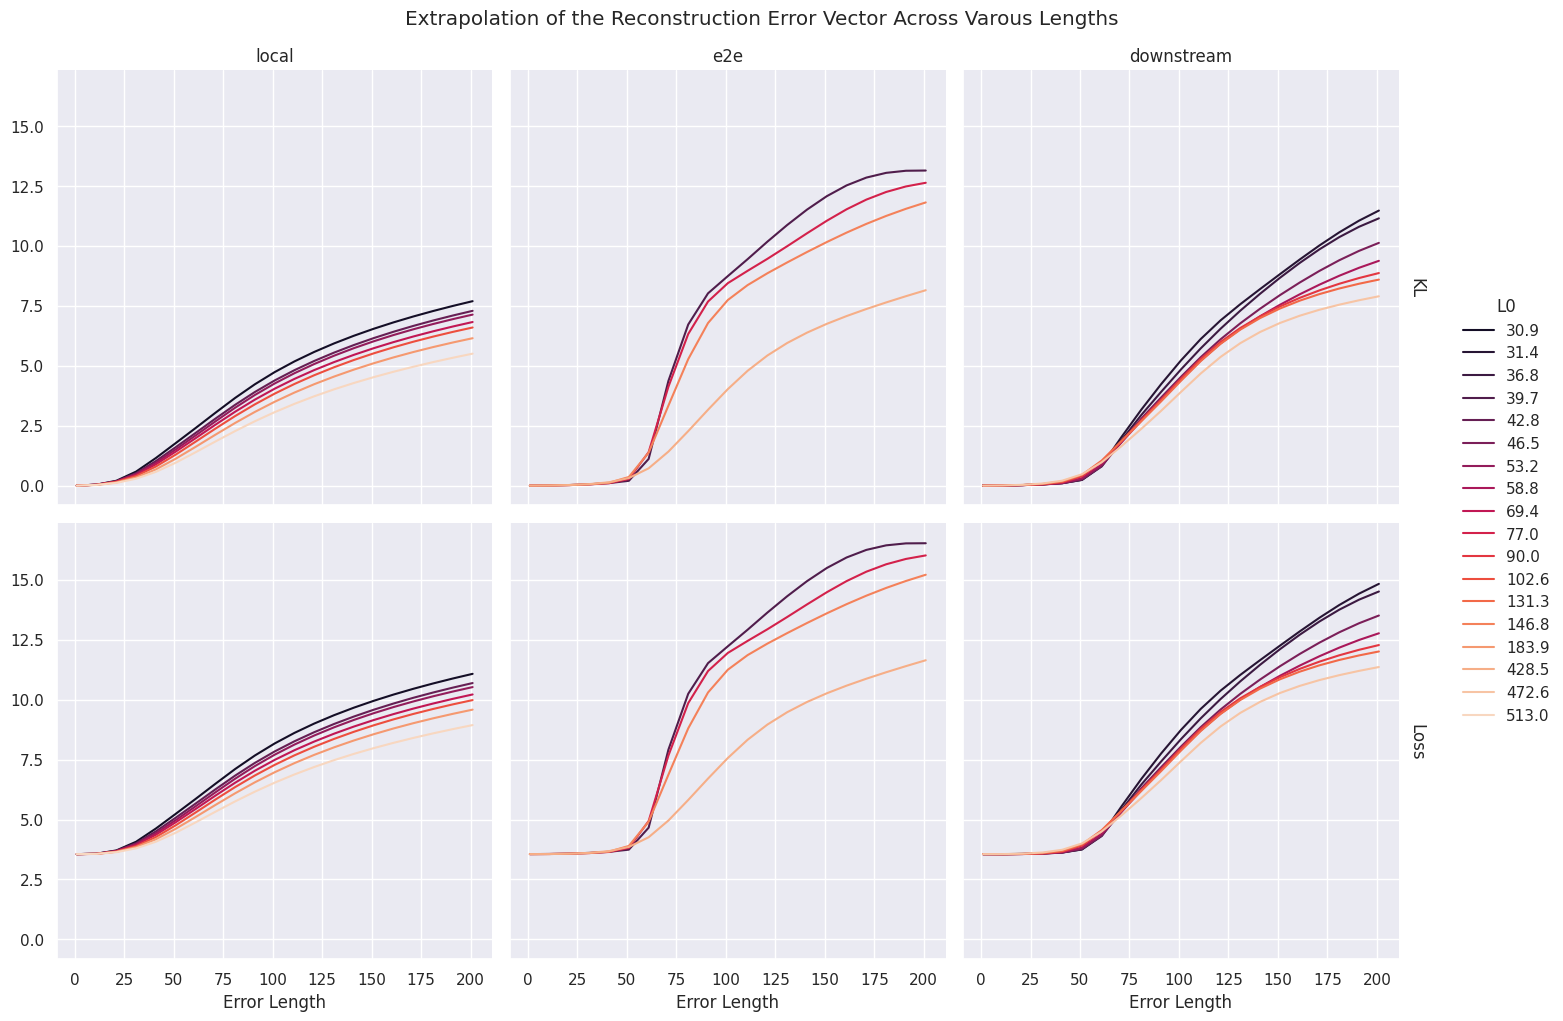

In [94]:
sns.set_theme(style="darkgrid")

mean_df_melt_plot = mean_df_melt[(mean_df_melt["L0"] >= 30)]

g = sns.FacetGrid(mean_df_melt_plot, row = "metric", col="type", height=5, margin_titles=True, hue = "L0", 
                  palette = 'rocket')

g.map(sns.lineplot, "error_length", "value")

g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.fig.suptitle(f'Extrapolation of the Reconstruction Error Vector Across Varous Lengths', y = 1.02)

g.set(xlabel="Error Length", ylabel = None)
g.add_legend()

plt.savefig("extrapolation_error.svg", format="svg", bbox_inches="tight")

In [87]:
mean_df_melt[mean_df_melt["error_length"] <=51]

,reconstruction_error,L0,type,variable,value,metric,error_length
0,36.059806,10.3,local,error_length_1_kl,0.000234,KL,1
1,29.591295,17.5,local,error_length_1_kl,0.000263,KL,1
2,24.628616,30.9,local,error_length_1_kl,0.000275,KL,1
3,22.497630,42.8,local,error_length_1_kl,0.000274,KL,1
4,21.354410,53.2,local,error_length_1_kl,0.000271,KL,1
...,...,...,...,...,...,...,...
17,43.970155,46.5,downstream,error_length_51_loss,3.777826,Loss,51
18,39.060228,58.8,downstream,error_length_51_loss,3.830541,Loss,51
19,32.357821,90.0,downstream,error_length_51_loss,3.910317,Loss,51
20,27.635548,131.3,downstream,error_length_51_loss,3.959643,Loss,51


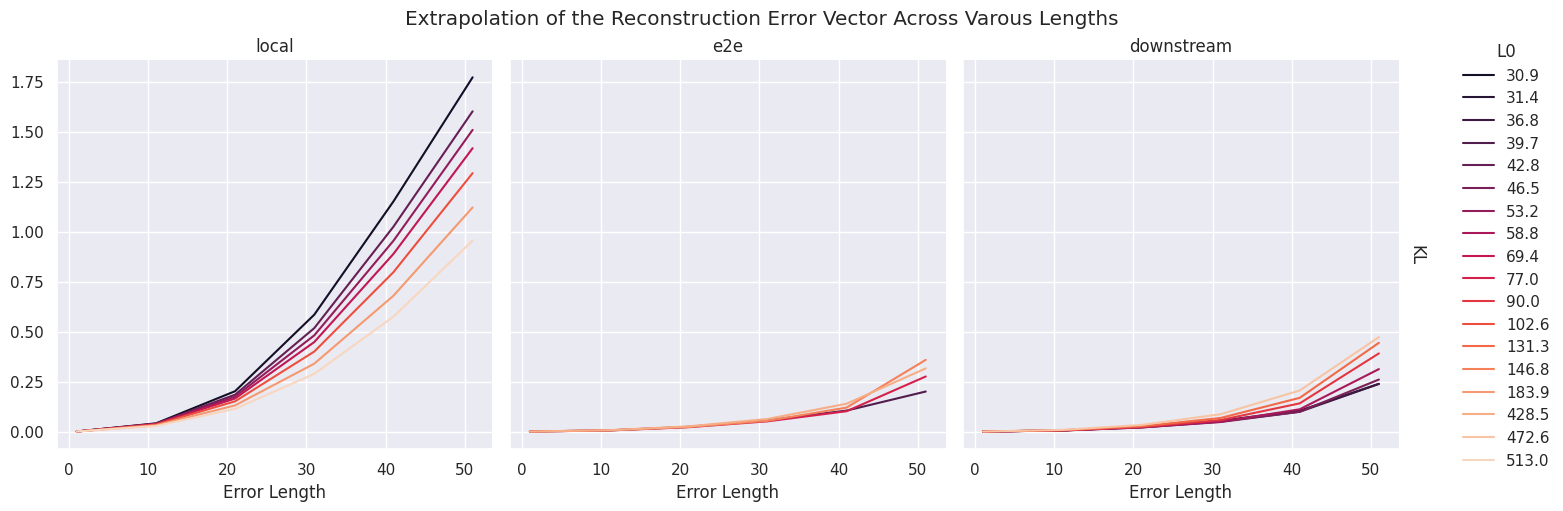

In [91]:
sns.set_theme(style="darkgrid")

mean_df_melt_plot = mean_df_melt[(mean_df_melt["L0"] >= 30) & (mean_df_melt["error_length"] <= 51) & (mean_df_melt["metric"] == "KL")]

g = sns.FacetGrid(mean_df_melt_plot, row = "metric", col="type", height=5, margin_titles=True, hue = "L0", 
                  palette = 'rocket')

g.map(sns.lineplot, "error_length", "value")

g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.fig.suptitle(f'Extrapolation of the Reconstruction Error Vector Across Varous Lengths', y = 1.02)

g.set(xlabel="Error Length", ylabel = None)
g.add_legend()